In [ ]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)
import os, sys
folder_name = 'Generation2' #@param {type:"string"}
os.chdir(os.getcwd()+'/drive/MyDrive/%s'%folder_name)

!pip -q install biopython ml-collections py3Dmol
# from data.data_transforms import transform, prepare_features
from data.loader import RNA, toPDB
from config import TRACK_CODES
from data.constants import RNA_const

from Bio import pairwise2

import py3Dmol
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
from ipywidgets import interact, fixed, GridspecLayout, Output
from mpl_toolkits.mplot3d import Axes3D

import os, json, gzip, glob
import numpy as np
from tqdm import tqdm

f = gzip.open('data/dataset.gz','rb')
loaded_rnas = json.loads(gzip.decompress(f.read()).decode("utf-8"))
all_data = {}
for dname, dat in loaded_rnas.items():
  all_data[dname] = {}
  for code,dictt in tqdm(dat.items()):
    all_data[dname][code] = dictt

Mounted at /content/drive


100%|██████████| 2273/2273 [00:00<00:00, 491628.15it/s]


In [ ]:
version = 6
path  = 'lightning_logs/version_%d/'%version

def collect(path, collect_all=False):
  paths = ['train_loss', 'train_disto', 'train_coords', 'train_store', 'val_loss', 'val_disto', 'val_coords']
  data = {}
  for p in paths:
    data[p] = {}
    print()

    if collect_all:
      for fn in tqdm(glob.glob(path+p+'/*')):
        f, x = fn.split('/')[-1].split('.')
        if x=='npy':
          data[p][f] = np.load(fn)
        elif x=='json':
          data[p][f] = json.loads(open(fn, 'r').read())
    else:
      names = {}
      for fn in glob.glob(path+p+'/*'):
        f, x = fn.split('/')[-1].split('.')

        a = f.split('-')
        if len(a)==5:
          (_, e, i, k1, k2) = a
          newk = k1+'-'+k2
          if newk in names:
            names[newk].append((int(e), int(i), f, fn))
          else:
            print(newk)
            names[newk] = [(int(e), int(i), f, fn)]
        else:
          print(a)
          data[p][int(a[1])] = json.loads(open(fn, 'r').read())

      # print((p, names.keys()))

      for k,v in names.items():
        v.sort(key=lambda x:x[0])
        e, i, f, fn = v[-1]
        # print('    '+f)
        # fns[k] = fn
        if x=='npy':
          data[p][k] = np.load(fn)
        elif x=='json':
          data[p][k] = json.loads(open(fn, 'r').read())
  return data

def collect13(path, collect_all=False):
  paths = ['train_loss', 'train_disto', 'train_coords', 'train_store', 'val_loss', 'val_disto', 'val_coords']
  data = {}
  for p in paths:
    data[p] = {}
    print()

    if collect_all:
      for fn in tqdm(glob.glob(path+p+'/*')):
        f, x = fn.split('/')[-1].split('.')
        if x=='npy':
          data[p][f] = np.load(fn)
        elif x=='json':
          data[p][f] = json.loads(open(fn, 'r').read())
    else:
      names = {}
      for fn in glob.glob(path+p+'/*'):
        f, x = fn.split('/')[-1].split('.')

        a = f.split('-')
        if 'coords' in p:
          data[p][a[-2]+'-'+a[-1]] = np.load(fn)
        # print((p, a))
        elif len(a)==5:
          (_, e, i, k1, k2) = a
          newk = k1+'-'+k2
          if newk in names:
            names[newk].append((int(e), int(i), f, fn))
          else:
            print(newk)
            names[newk] = [(int(e), int(i), f, fn)]
        else:
          print(a)
          data[p][int(a[1])] = json.loads(open(fn, 'r').read())

      # print((p, names.keys()))
      if 'coords' not in p:
        for k,v in names.items():
          v.sort(key=lambda x:x[0])
          e, i, f, fn = v[-1]
          # print('    '+f)
          # fns[k] = fn
          if x=='npy':
            data[p][k] = np.load(fn)
          elif x=='json':
            data[p][k] = json.loads(open(fn, 'r').read())
  return data


logs = collect13(path)


['epo', '0', '0']
['epo', '1', '1']
['epo', '2', '2']
['epo', '3', '3']
['epo', '4', '4']
['epo', '5', '5']
['epo', '6', '6']
['epo', '7', '7']
['epo', '8', '8']
['epo', '9', '9']
['epo', '10', '10']
['epo', '11', '11']

4WF9-X
3P22-A
6Q97-4
5Y85-D
7L49-E
6ID1-H
3PU1-R
3EGZ-B
2QWY-C
1MZP-B
6NY2-B
6SGC-23
6ZJ3-LN
4WQ1-3K



['epo', '0', '0']
['epo', '0', '1']
['epo', '1', '2']
['epo', '2', '3']
['epo', '3', '4']
['epo', '4', '5']
['epo', '5', '6']
['epo', '6', '7']
['epo', '7', '8']
['epo', '8', '9']
['epo', '9', '10']
['epo', '10', '11']
['epo', '11', '12']

4Y4O-1B
4V9F-9
6S0Z-B
6YSI-5
1MJI-D
7O7Y-B7
6AZ3-8
4YBB-DB
5NS3-C
2V3C-N
5AOX-C
3K1V-A
1L2X-A
6V9B-D
6V9B-B
4JNG-L



In [ ]:
for k, v in logs.items():
  print(k)
  print(v.keys())

train_loss
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
train_disto
dict_keys(['4WF9-X', '3P22-A', '6Q97-4', '5Y85-D', '7L49-E', '6ID1-H', '3PU1-R', '3EGZ-B', '2QWY-C', '1MZP-B', '6NY2-B', '6SGC-23', '6ZJ3-LN', '4WQ1-3K'])
train_coords
dict_keys(['4WF9-X', '3P22-A', '6Q97-4', '5Y85-D', '7L49-E', '6ID1-H', '3PU1-R', '3EGZ-B', '2QWY-C', '1MZP-B', '6NY2-B', '6SGC-23', '6ZJ3-LN', '4WQ1-3K'])
train_store
dict_keys([])
val_loss
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
val_disto
dict_keys(['4Y4O-1B', '4V9F-9', '6S0Z-B', '6YSI-5', '1MJI-D', '7O7Y-B7', '6AZ3-8', '4YBB-DB', '5NS3-C', '2V3C-N', '5AOX-C', '3K1V-A', '1L2X-A', '6V9B-D', '6V9B-B', '4JNG-L'])
val_coords
dict_keys(['4Y4O-1B', '4V9F-9', '6S0Z-B', '6YSI-5', '1MJI-D', '7O7Y-B7', '6AZ3-8', '4YBB-DB', '5NS3-C', '2V3C-N', '5AOX-C', '3K1V-A', '1L2X-A', '6V9B-D', '6V9B-B', '4JNG-L'])


In [ ]:
# data['train_coords'].keys()

In [ ]:
# dtrain_coords = {}
# for k, v in data['train_coords'].items():
#   (_, e, i, k1, k2) = k.split('-')
#   newk = k1+'-'+k2
#   if newk in dtrain_coords:
#     dtrain_coords[newk].append((int(e), int(i), v))
#   else:
#     dtrain_coords[newk] = [(int(e), int(i), v)]

In [ ]:
def plot(rna, tempdir='visualise/', size=(1000, 700)):
  if not os.path.isdir(tempdir): os.mkdir(tempdir)
  
  pdb_string = toPDB(rna)

  unrelaxed_pdb_path = tempdir + rna.code + '.pdb'
  with open(unrelaxed_pdb_path, 'w') as f: f.write(pdb_string)

  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js', width=size[0], height=size[1])
  view.addModel(pdb_string,'pdb')
  view.setStyle({'cartoon': {'color':'spectrum'}})
  view.zoomTo()
  view.show()

def RMSE(X1, X2): return np.mean( ((X1-X2)**2).sum(1) )**0.5

def alignCoordsRMSE(X1, X2):
  ''' applys a translation to align centroids of X1 and X2, then find rotation '''
  X1, X2 = X1 - np.mean(X1, 0)[None,:], X2 - np.mean(X2, 0)[None,:]
  
  H = X1.T.dot(X2)
  U, s, Vh = np.linalg.svd(H, full_matrices=True)
  a = (U.dot(np.diag(s)).dot(Vh)-H).sum()
  assert a<1e-2, 'decomposition failed: '+str(a)
  
  R = Vh.T.dot(U.T)
  X2 = (R.T.dot(X2.T)).T

  # fig = plt.figure()
  # ax = fig.add_subplot(projection='3d')
  # ax.scatter(*X1.T, marker='o')
  # ax.scatter(*X2.T, marker='^')
  # plt.show()

  # D1 = ((X1[None, :,:] - X1[:,None,:])**2).sum(-1)**0.5
  # plt.imshow(D1)
  # plt.show()

  # D2 = ((X2[None, :,:] - X2[:,None,:])**2).sum(-1)**0.5
  # plt.imshow(D2)
  # plt.show()


  # X1, X2: axis 0 is base, axis 1 is [x,y,z]
  # print(((X1-X2)**2).sum(1))
  # print(((X1-X2)**2).sum(1).shape)
  rmse = RMSE(X1, X2)

  return X1, X2, rmse, R

def super_plot(rnas, colfns=None, size=(1000,800)):
  ''' col_fn1(position, residue)->(int,)*3 '''
  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js', width=size[0], height=size[1])

  if colfns is None:
    for rna in rnas:
      view.addModel(toPDB(rna),'pdb')
      view.setStyle({'cartoon': {'color':"spectrum"}})
  else:
    assert len(rnas)==len(colfns), 'invalid args, both must have same length'
    for rna, col_fn in zip(rnas, colfns):
      pdbstr = toPDB(rna)
      view.addModelsAsFrames(pdbstr)
      i = 0
      l = sum(len(RNA_const.base_atom_order[b]) for b in rna.sequence)
      
      for line in pdbstr.split("\n"):
        split = line.split()
        if len(split) == 0 or split[0] != "ATOM": continue
        base = split[3][0]
        idx = int(split[1])
        color = 'rgb(%d, %d, %d)' % col_fn(float(idx)/l, base)
        view.setStyle({'model': -1, 'serial': i+1}, {"cartoon": {'color': color}})
        i += 1

  view.zoomTo()
  view.show()

def cfns():
  base2i = {'A':0,'G':1,'C':2,'U':3}

  def getmap(palette):
    return np.array([[palette(j+i) for i in [0,63]] for j in [0, 64, 128, 192]])

  def cf(prop, base, CM):
    if base not in base2i: return 'red'
    cs, ce = CM[base2i[base]]
    return tuple(np.round(255. * (cs * prop + ce * (1-prop))).astype(int).tolist())[:-1]


  CM1 = getmap(sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))
  CM2 = getmap(sns.cubehelix_palette(as_cmap=True))
  CM3 = getmap(sns.color_palette("YlOrBr", as_cmap=True))
  CM4 = getmap(sns.color_palette("Blues", as_cmap=True))
  CM5 = getmap(sns.color_palette("dark:salmon_r", as_cmap=True))
  
  return {
    'greens':lambda p,b: cf(p,b,CM1),
    'pinks':lambda p,b: cf(p,b,CM2),
    'yellows':lambda p,b: cf(p,b,CM3),
    'blues':lambda p,b: cf(p,b,CM4),
    'reds':lambda p,b: cf(p,b,CM5),
  }

COL_DICT = cfns()

def vis_single(index, size = (520, 500)):
  pred_ = {}
  for experiment,_,_ in info:
    true_rna, pred_rna, key = get_pred(experiment, index)
    pred_[experiment] = (pred_rna, key)
  closest_code, s1, s2 = find_closest(key, true_rna)
  print('Closest RNA')
  plot(RNA(**all_data['train'][closest_code]), size=size)
  print('True RNA')
  plot(true_rna, size=size)
  for experiment, _ in info:
    print(experiment)
    plot(pred_[experiment][0], size=size)

In [ ]:
logs['train_coords'].keys()

dict_keys(['7KRP-T', '5Y85-D', '6NE0-M', '7CXM-I', '6TQN-R', '4QYZ-L', '6VFF-C', '7KRN-P', '5KK5-B', '3CIY-C', '6PIJ-1', '5DEA-A', '3EGZ-B', '6H0R-A', '6YL5-I', '1JID-B', '7L49-E', '6YML-A', '5XLO-K', '1MZP-B', '6D12-C', '3GS5-A', '6SY6-D', '5U0A-K', '5H9F-L', '1HMH-A', '1I6U-C', '7KRN-T', '6S8B-V', '6DU4-B', '2YHM-K', '6UVN-M', '5DE8-A', '7DMQ-B', '2QUX-F', '4NLF-A', '6B44-M', '6Q97-4', '6S8B-U', '2ZY6-A', '5DEA-C', '3PU1-R', '3VJR-B', '6DTD-C', '4WF9-X', '2HW8-B', '1C9S-W', '6VQV-L', '6NY2-B', '3HJY-D', '1KOG-O', '6F4G-C', '4BW0-A', '1OOA-C', '2OZB-C', '2BH2-D', '7CYQ-I', '6UGI-A', '4WQ1-3K', '6C66-J', '3CIY-D', '2QWY-C', '3B5S-B', '359D-B', '5UNE-B', '3R9W-B', '3WBM-Y', '6LNB-M', '5NFV-B', '6ID1-H', '3SN2-B', '3P22-A', '6ZJ3-LN', '6SGC-23', '7KHA-J'])

In [ ]:
ccccc = []
for k,(a,b) in logs['train_coords'].items():
  try:
    _,_,rmse,_ = alignCoordsRMSE(a[:,-3:],b[:,-3:])
    ccccc.append((k,rmse, len(a)))
    # print(ccccc[-1])
  except:
    print('failed on '+k)
ccccc.sort(key=lambda x:x[1])
for a in ccccc: print(a)

failed on 6C66-J
('7CYQ-I', 0.3295750254372847, 25)
('5UNE-B', 0.3847653539046674, 47)
('6F4G-C', 0.41326384624909107, 25)
('2OZB-C', 0.5186598216806843, 33)
('7CXM-I', 0.5221665167801722, 25)
('3HJY-D', 0.5374804792629778, 25)
('3CIY-D', 0.5380619826064545, 46)
('3CIY-C', 0.5639771563354269, 46)
('2QUX-F', 0.5730142221333514, 25)
('2BH2-D', 0.65246535212872, 29)
('7KRP-T', 0.7890580432123904, 36)
('3R9W-B', 0.8015535677585055, 34)
('7KRN-P', 0.9325542009264437, 37)
('6VFF-C', 1.1047758485248054, 31)
('6SY6-D', 1.3660526470243153, 36)
('3WBM-Y', 1.3732421649297528, 25)
('6S8B-V', 1.8225067404372497, 49)
('6S8B-U', 2.447875803072048, 44)
('5NFV-B', 8.054887356577275, 39)
('5KK5-B', 8.508399852028123, 39)
('6D12-C', 10.00669217297249, 38)
('1MZP-B', 11.452974451176292, 55)
('7KHA-J', 11.659195024240793, 45)
('7DMQ-B', 12.464354694064717, 53)
('5DE8-A', 13.98453594093842, 35)
('5DEA-C', 14.231500228538199, 35)
('3SN2-B', 14.800627122943874, 29)
('7KRN-T', 14.842425927788051, 43)
('4BW0-A'

In [ ]:
# for k,(a,b) in logs['train_coords'].items():
#   print((k, RMSE(a,b)))

# code = '1MMS-C'
# c1 = 'greens'
# c2 = 'reds'

# example = all_data['train'][code]
# pred_rna = dict(example)
# at = np.array(pred_rna['atom_positions'])
# pred_rna['atom_positions'] = (at + np.random.randn(*at.shape)*0.4).tolist()

# super_plot([RNA(**example), RNA(**pred_rna)], colfns=[COL_DICT[c1], COL_DICT[c2]], size=(1300, 1000))

In [ ]:
def createRNA(code, fl='train'):
  pred, true = logs[fl+'_coords'][code]
  true, pred,_,_ = alignCoordsRMSE(true[:,-3:],pred[:,-3:])
  if fl=='val':fl = 'validation'
  example = all_data[fl][code]

  origin = RNA_const.basis[0]

  tr = RNA(**example)

  at = np.array(example['atom_positions'])
  # mask = np.array(example['atom_mask'])[:,origin]
  tr_origin = at[:,origin,:]

  n, m = len(at), len(true)
  diff = n - m
  if 0 < diff:
    a = np.zeros(diff)
    for i in range(diff):
      _,_,rmse,_ = alignCoordsRMSE(tr_origin[i:n-diff+i], true)
      a[i] = rmse
    j = np.argmin(a)
    print((a, j))
    tr_origin = tr_origin[j:n-diff+j]
    at = at[j:n-diff+j]
    example['num_res'] = m
    example['sequence'] = example['sequence'][j:n-diff+j]
    example['atom_mask'] = example['atom_mask'][j:n-diff+j]
    example['base_index'] = example['base_index'][j:n-diff+j]
    example['b_factors'] = example['b_factors'][j:n-diff+j]

  X1, X2, rmse, R = alignCoordsRMSE(tr_origin, true)
  newtrue = at.dot(R)
  newtrueorigin = newtrue[:,origin,:]
  newtrue -= newtrueorigin.mean(0)[None,None,:] + true.mean(0)[None,None,:]

  # newtrue and pred are aligned.
  truebase2atom = newtrue - newtrue[:,origin,:][:,None,:]
  pred_atoms = truebase2atom + pred[:,None,:]

  pred_rna = dict(example)
  true_rna = dict(example)
  pred_rna['atom_positions'] = pred_atoms
  true_rna['atom_positions'] = newtrue
  return RNA(**true_rna), RNA(**pred_rna)

def plotRNA(code, c1='blues', c2='pinks', fl='train'):
  tr, pr = createRNA(code, fl=fl)
  origin=RNA_const.basis[0]

  fig = plt.figure()
  ax = plt.subplot2grid((1,1),(0,0),projection='3d')
  ax.plot(*tr.atom_positions[:,origin,:].T, '-o', lw=0.3, label='Target')
  ax.plot(*pr.atom_positions[:,origin,:].T, '-^', lw=0.3, label='Prediction')
  ax.legend()
  print(len(tr.atom_positions))

  disto = logs[fl+'_disto'][code]
  t = tr.atom_positions[:,origin,:]
  td = ((t[None,:,:] - t[:,None,:])**2).sum(-1)**0.5
  td[td>35] = 35
  plt.matshow(disto)
  plt.show()
  plt.matshow(td)
  plt.show()


  super_plot([tr, pr], colfns=[COL_DICT[c1], COL_DICT[c2]], size=(1300, 1000))

In [ ]:
logs['train_disto'].keys()

dict_keys(['4WF9-X', '3P22-A', '6Q97-4', '5Y85-D', '7L49-E', '6ID1-H', '3PU1-R', '3EGZ-B', '2QWY-C', '1MZP-B', '6NY2-B', '6SGC-23', '6ZJ3-LN', '4WQ1-3K'])

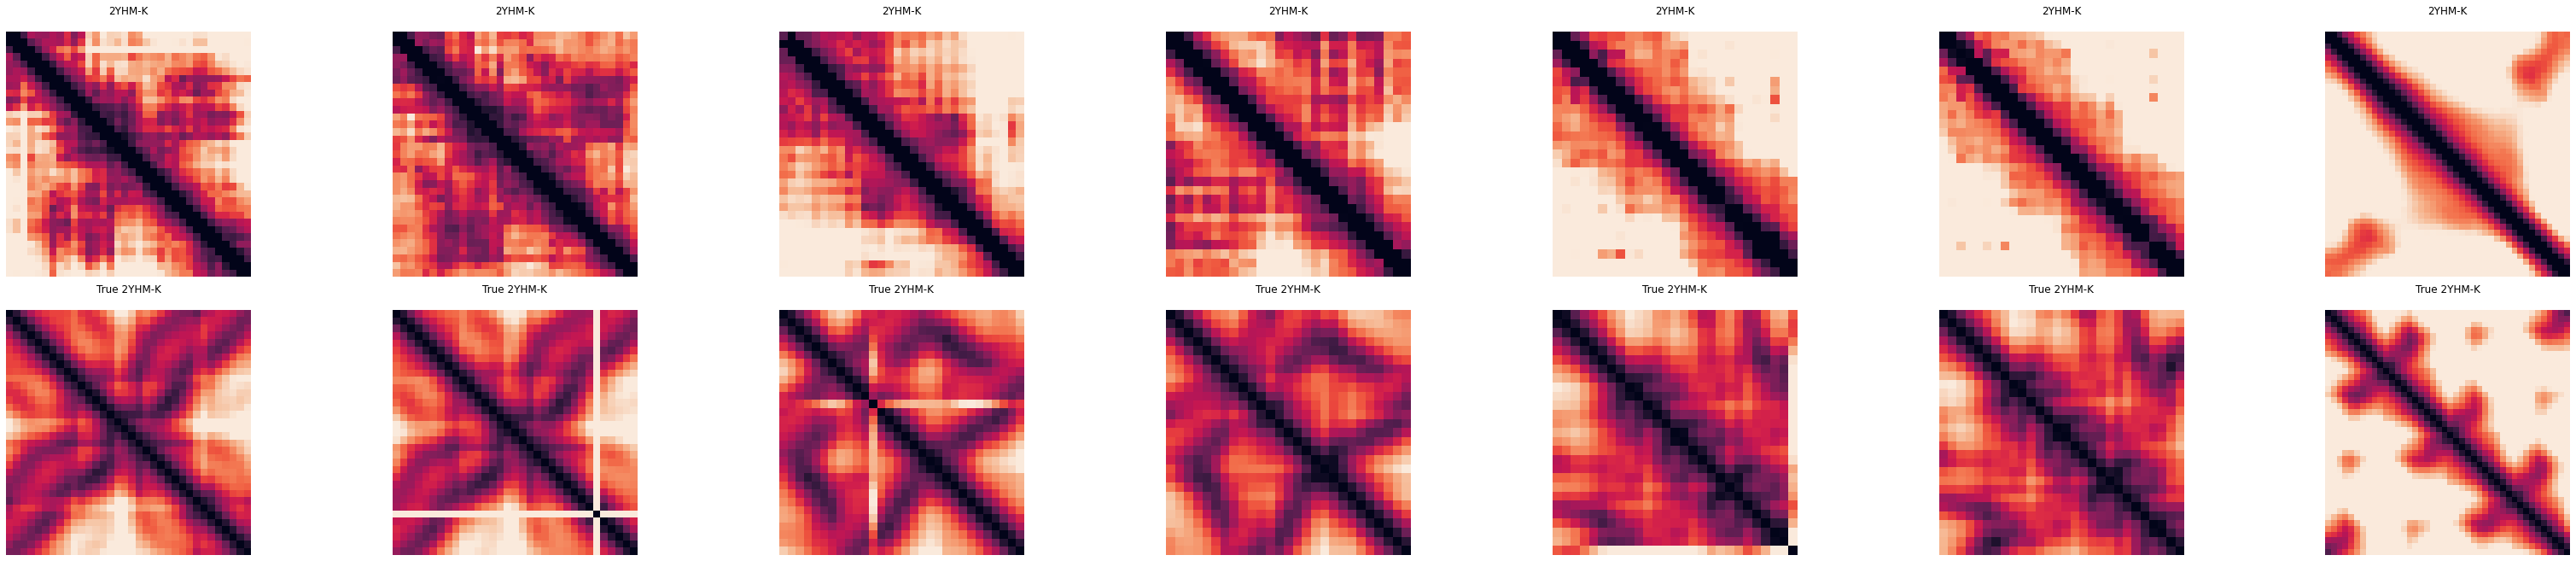

In [ ]:

def get_disto(code, fl='train', origin=RNA_const.basis[0]):
  disto = logs[fl+'_disto'][code]
  if fl=='val':fl = 'validation'
  atom_positions = np.array(all_data[fl][code]['atom_positions'])
  t = atom_positions[:,origin,:]
  td = ((t[None,:,:] - t[:,None,:])**2).sum(-1)**0.5
  td[td>35] = 35
  td[td<3] = 3
  return disto, td

def plot_disto(name, codes, fl='train'):
  cm = sns.color_palette("rocket", as_cmap=True)

  fig = plt.figure(figsize=((len(codes)+2)*5, 2*5))
  dtd = [get_disto(code, fl=fl) for code in codes]
  for i, (d,td) in enumerate(dtd):
    ax = fig.add_subplot(2, len(codes), i+1)
    # d, td = get_disto(code, fl=fl)
    ax.matshow(d, cmap=cm)
    ax.axis('off')
    ax.set_title(code)
    ax = fig.add_subplot(2, len(codes), len(codes) + i+1)
    ax.matshow(td, cmap=cm)
    ax.axis('off')
    ax.set_title('True '+code)

  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.savefig('disto'+name+'.pdf')
  plt.show()

# codes = ['2OZB-C','6SY6-D','3R9W-B','5UNE-B','5H9F-L']
codes = [k for k,v in logs['val_disto'].items() if len(v)<60]
plot_disto('training', codes, fl='val')

In [ ]:
vvv = []
for k,(a,b) in logs['val_coords'].items():
  try:
    _,_,rmse,_ = alignCoordsRMSE(a[:,-3:],b[:,-3:])
    vvv.append((k,rmse, len(a)))
    # print(ccccc[-1])
  except:
    print('failed on '+k)
vvv.sort(key=lambda x:x[1])
for a in ccccc: print(a)

failed on 7O7Y-B7


NameError: ignored

In [ ]:
# for code,r,l in vvv[:15]:
#   print('%s--rmsd-%.2f-len%d'%(code, r,l))
#   plotRNA(code, c1='greens',c2='pinks', fl='val')

In [ ]:
# code = '2QWY-C'#['6S8B-U', '7L49-E','7KRP-T', '7KRN-P', '1C9S-W', '7CXM-I','3CIY-C','7CYQ-I'][0]#['2QWY-C', '5Y85-D', '1MZP-B', '3PU1-R'][3]

# for code,r,l in ccccc[-13:-7]:
#   print('%s--rmsd-%.2f-len%d'%(code, r,l))
#   plotRNA(code, c1='greens',c2='blues')

In [ ]:
# indices = [0,2,7,8,9,10,11,12,13,14,15,19,33,35,36,37]

# for i in indices[:10]:
#   print('index: '+str(i))
#   vis(i)
#   print('-'*200, end='\n\n\n')

In [ ]:
TRACK_CODES.keys()

dict_keys(['train_metrics', 'train_coords_to_track', 'val_coords_to_track'])

In [ ]:
mpl.rcParams['lines.linewidth'] = 0.5

smoother = lambda l, s:[sum(l[i:i+s])/s for i in range(len(l)-s)]

def smooth_sd(l, sm, med=False):# not efficient, but doesn't matter only plotting a small num
  l = np.array(l)
  msd = tuple(zip(*[(np.mean(l[j:j+sm]), np.std(l[j:j+sm])) for j in range(len(l)-sm)]))
  if not med: return msd
  md = [np.percentile(l[j:j+sm], 50) for j in range(len(l)-sm)]
  return msd + (md, )


def plot_metrics(dir_, smooth, metr, s='Training ', error_bars=True):
  c = sns.color_palette("rocket_r", as_cmap=True)
  ci = [60, 100, 150, 200]
  pdata = zip(('TM-Score Lower Bound','RMSD','GDT','lDDT'), metr, ci)
  f, axes = plt.subplots(1, len(ci), figsize=(6*len(ci), 4))
  clean = lambda l:np.array([yy for yy in l if yy is not None])

  for i,(n,y,ci) in enumerate(pdata):
    y=clean(y)
    if error_bars:
      plot_sd_fill(y, smooth, c(ci), '','%s', ax=axes[i], med=True)
    else:
      axes[i].plot(smoother(l, smooth), c=c(ci))
    # axes[i].plot([np.mean(y[j:j+smooth]) for j in range(len(y)-smooth)], c=c(ci))
    axes[i].set_title(s+n)
  plt.legend()
  plt.savefig(dir_+s[:-1]+'_metrics_smoothed.pdf')
  plt.show()

def violin(lengths, epochs, performance, th, c1, c2, ax):
  x = "Epoch"
  y = "Performance"
  z = "Length"

  ###
  for i in range(len(lengths)): 
    if lengths[i] < th: break
  def perm(ls):# to make colours consistent between plots
    first = ls[0]
    ls[0] = ls[i]
    ls[i] = first
    return ls
  performance, lengths, epochs = list(map(perm, [performance, lengths, epochs]))
  ###

  d = {
    y: performance, 
    z: ['Length > %d'%th if l>th else 'Length $\leq$ %d'%th for l in lengths],
    x: epochs
  }

  ax = sns.violinplot(x=x, y=y, hue=z, data=d, palette=sns.color_palette([c1,c2]), split=True, 
                      scale="width", scale_hue=False, bw=.2, ax=ax)
                      #inner="stick",scale="counts",
  ax.set_xlabel(x)

def plot_violins(dir_, lengths, epochs, metr, th, s='Training '):
  c = sns.color_palette("rocket_r", as_cmap=True)
  ci = [120, 160, 200, 240]
  diff = -100
  pdata = zip(('TM-Score Lower Bound','RMSD','GDT','lDDT'), metr, ci)
  f, axes = plt.subplots(1, len(ci), figsize=(6*len(ci), 4))
  epochs = ['%d'%i for i in epochs]
  print('prop < threshold : %.3f'%(sum(l<th for l in lengths)/len(lengths)))

  for i,(n,y,ci) in enumerate(pdata):
    violin(lengths, epochs, y, th, c(ci), c(ci+diff), axes[i])
    axes[i].set_title(n)
    if n=='RMSD':axes[i].set_ylim(0, 100)
  # plt.legend()
  plt.suptitle(s[:-1])
  plt.savefig(dir_+s[:-1]+'_metrics_violin.pdf')
  plt.show()

def plot_sd_fill(l, smooth, c, s='', ss='%s Loss', ax=None, med=False):
  msd = list(map(np.array, smooth_sd(l, smooth, med)))
  m, sd = msd[0], msd[1]
  p = plt if ax is None else ax
  p.plot(m, label=ss%s, c=c)
  if med:
    p.plot(msd[2], label='', c='k', lw=0.2)#, linestyle='dotted')
  p.fill_between(range(len(m)), m-sd, m+sd, color=c, alpha=0.15)#, label='$\pm\sigma$')

def recalibrate_train_data_distribution(experiment, filter_epo=2):
  '''
  For the randomised training dataloader it samples examples according to length
  and resolution. We are only concerned with the highest resolution, and differ-
  ent length RNA should be equally represented as short ones in these plots.
  '''
  epoch_metrics = rec[experiment][0]['train_metrics']

  c2dat = {code:[[] for _ in range(len(epoch_metrics))] for code in high_res}
  for i,e in enumerate(epoch_metrics):
    for bi,c,tm,rmsd,gdt,lddt in e:
      if all([a is not None for a in [tm,rmsd,gdt,lddt]]):
        if c in c2dat:
          c2dat[c][i].append([tm,rmsd,gdt,lddt])

  def unzip_av(ep):# averages per code over epoch
    metr = list(zip(*ep))
    return [sum(l)/len(l) for l in metr]

  c2avdat = {c:[unzip_av(ep) for ep in v] for c,v in c2dat.items()}

  lists = []
  for code, epo in c2avdat.items():
    for i, l in enumerate(epo):
      if len(l)!=0:
        [tm, rmsd, gdt, lddt] = l
        if i%filter_epo==1:
          lists.append([i+1, code, tm, rmsd, gdt, lddt])

  lists.sort(key=lambda ii:ii[0])
  
  epoch, code, tm, rmsd, gdt, lddt = list(map(list,list(zip(*lists))))
  return epoch, code, tm, rmsd, gdt, lddt

def plot_scatter(data, n_cat):
    fig, axes = plt.subplots(1, len(data['x_data']), figsize=(6 * len(data['x_data']), 4), 
        gridspec_kw={'width_ratios': [4]*(len(data['x_data'])-1) + [5]}, sharey=True)
    fig.subplots_adjust(wspace=0)

    cmap = sns.cubehelix_palette(as_cmap=True)
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', [cmap(i) for i in range(cmap.N)], cmap.N)
    bounds = np.linspace(0, n_cat, n_cat+1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    axes[0].set_ylabel(data['y_label'])
    for (name, x), ax in zip(data['x_data'].items(),axes):
        scat = ax.scatter(x, data['y_data'], c=data['color'][1], 
            s=data['size'][1], cmap=cmap, norm=norm)
        ax.set_xlabel(name)
        
    decoy = ax.scatter(x, data['y_data'], c=data['color'][1], 
            s=data['fixsize'], alpha=0.8, cmap=cmap, 
            edgecolors='white', linewidths=0.01)
    # print(scat.legend_elements("sizes", num=2))
    lines, names = decoy.legend_elements("sizes", num=3)
    ax.legend(lines, data['size'][0])
    decoy.set_alpha(0)

    cbar = fig.colorbar(scat, ax=axes[-1], 
        label=data['color'][0], 
        ticks=[0.5+i for i in range(len(data['color'][2]))]) 
    cbar.ax.set_yticklabels(data['color'][2])

def plot_selection(logs, experiment, smooth=100, error_bars=True, tr=None, iii=2):
  dir_ = 'figures/%s/'%experiment
  if not os.path.isdir('figures'): os.mkdir('figures')
  if not os.path.isdir(dir_): os.mkdir(dir_)

  # code, L = list(zip(*[v for k,v in logs['train_loss'].items()]))

  # plt.plot(idx)# each batch
  # plt.show()

  epoch_metrics = logs['train_store']
  eee = []
  for j,(_,ep) in enumerate(epoch_metrics.items()):
    if j%iii==0:# too many violins look cluttered
      for c,e,i,l,tm,rmsd,gdt,lddt,l1,l3 in ep:
        eee.append((e,i,c,tm,rmsd,gdt,lddt,l,l1,l3))

    # if i%2==1:# too many violins look cluttered
      # for bi,c,tm,rmsd,gdt,lddt in e:
      #   if all([a is not None for a in [tm,rmsd,gdt,lddt]]):
      #     eee.append((i+1,bi,c,tm,rmsd,gdt,lddt))
  epoch, batch_idx, code, tm, rmsd, gdt, lddt, l_, l_1, l_3 = list(map(list,zip(*eee)))

  # epoch, code, tm, rmsd, gdt, lddt = recalibrate_train_data_distribution(experiment, filter_epo=2)

  if tr is not None:
    lengths = [code2lengths[c] for c in code]
    plot_violins(dir_, lengths, epoch, (tm, rmsd, gdt, lddt), tr, s='Training ')
  else:
    plot_metrics(dir_, smooth, (tm, rmsd, gdt, lddt))

  c = sns.color_palette("crest", as_cmap=True)
  ci_ = [80, 120, 200, 240]

  d = [l_, l_1, l_3] #[L, L_msa, L_dist, L_struc]
  lb = ['Total', 'Distogram', 'Backbone']#['Total', 'MSA', 'Distogram', 'Structure']

  pdata = lambda ls: zip(ls, lb, ci_)

  for l,s,ci in pdata(d):
    if error_bars:
      plot_sd_fill(l, smooth, c(ci), s)
    else:
      plt.plot(smoother(l, smooth), label='%s Loss'%s, c=c(ci))
  plt.legend()
  plt.xlabel('Step')
  plt.title('Training Loss')
  plt.savefig(dir_+'train_loss.pdf')
  plt.show()


  # rmse_key = [r for c, r in zip(code, rmsd) if c==key]
  # print(rmse_key)

  if tr is not None:
    joined = []# first 'epoch' is only 2 examples, I think lightning tests valstep at the start
    for i,e in enumerate([v for k,v in logs['val_loss'].items()][1:]):
      if i%iii==0:# too many violins look cluttered
        for c,l,tm,rmsd,gdt,lddt,l1,l3 in e:
          # if all([a is not None for a in [tm,rmsd,gdt,lddt]]):
            joined.append((i+1,c,tm,rmsd,gdt,lddt,l,l1,l3))
    epoch, code, tm, rmsd, gdt, lddt, L, L1, L3 = list(map(list,zip(*joined)))
    lengths = [code2vallengths[c] for c in code]
    plot_violins(dir_, lengths, epoch, (tm, rmsd, gdt, lddt), tr, s='Validation ')
  else:
    joined = []
    for e in [v for k,v in logs['val_loss'].items()][1:]: joined += e
    code, tm, rmsd, gdt, lddt, L, L_msa, L_dist, L_struc = list(map(list,zip(*joined)))
    plot_metrics(dir_, smooth, (tm, rmsd, gdt, lddt), s='Validation ')


  c = sns.color_palette("crest", as_cmap=True)
  ci_ = [80, 120, 200, 240]

  d = [L, L1, L3]#[L, L_msa, L_dist, L_struc]
  for l,s,ci in pdata(d):
    if error_bars:
      plot_sd_fill(l, smooth, c(ci), s)
    else:
      plt.plot(smoother(l, smooth), label='%s Loss'%s, c=c(ci))
  plt.legend()
  plt.xlabel('Step')
  plt.plot()
  plt.title('Validation Loss')
  plt.savefig(dir_+'val_loss.pdf')
  plt.show()

  # plot hold-out performance
  # plot length against errors, colour by MSA/resolution

  # code, tm, rmsd, gdt, lddt, l_tot, l_msa, l_dist, l_strc = list(zip(*rec[experiment][1]))
  # lengths = [len(holdout_set[c].sequence) for c in code]
  epoch, batch_idx, code, tm, rmsd, gdt, lddt, l_, l_1, l_3 = list(map(list,zip(*eee)))

  # res = ['$1.5\\AA$','$2.0\\AA$','$2.5\\AA$','$3.0\\AA$','$3.5\\AA$','$4.0\\AA$','$20.0\\AA$','other']
  rkeys = ['1.5A', '2.0A', '2.5A', '3.0A', '3.5A', '4.0A', '20.0A', 'above 20']
  res = np.ones(len(code), dtype=int) * len(rkeys)-1
  for i,r in enumerate(rkeys):
    for j,c in enumerate(code):
      if c in resolution_bins[r]:
        res[j] = i

  msa = np.array([len(all_data['train'][c]['msa'])>1 for c in code])
  
  data = {
    'y_label':'RNA Length',
    'y_data': [len(all_data['train'][c]['sequence']) for c in code],
    'x_data': {
      'TM Score Lower Bound': tm,
      'RMSE Error': rmsd,
      'GDT': gdt,
      'LDDT': lddt,
    },
    'size':(['No MSA','MSA'], msa*10 + 5),
    'color':('Resolution', res, 
             [('$%s$'%s).replace('A','\\AA') for s in rkeys[:-1]] + [rkeys[-1]]),
    'fixsize':msa*40 + 0.0001
  }

  plot_scatter(data, len(rkeys))
  plt.savefig(dir_+'test_metrics.pdf')
  plt.show()

In [ ]:
logs.keys()

dict_keys(['train_loss', 'train_disto', 'train_coords', 'train_store', 'val_loss', 'val_disto', 'val_coords'])

prop < threshold : 0.909


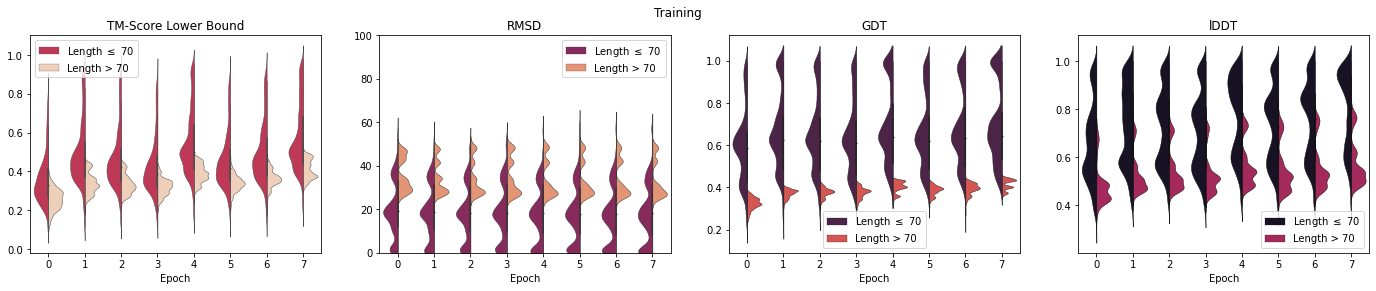

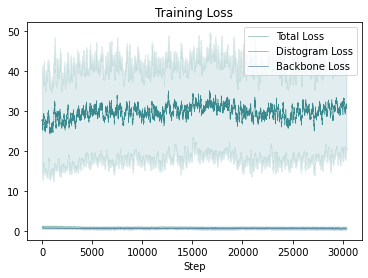

prop < threshold : 0.371


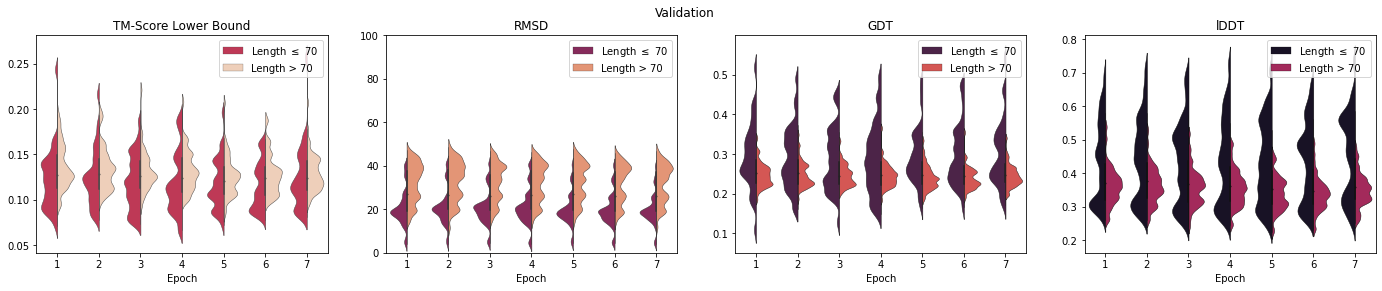

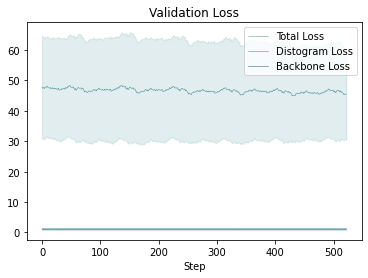

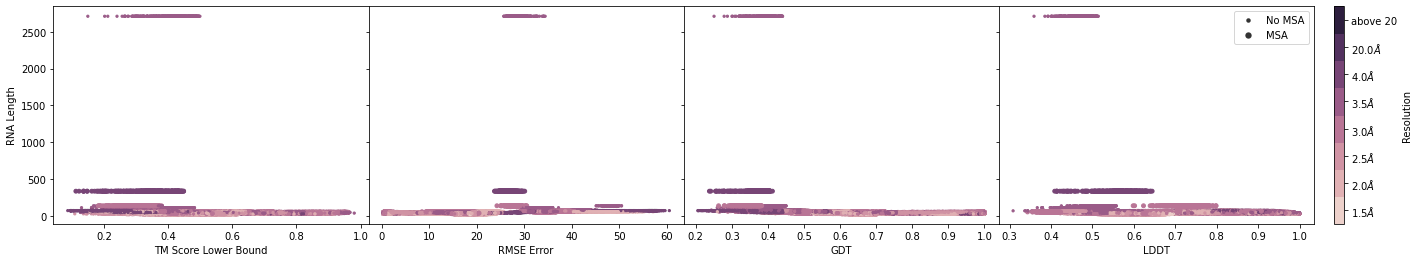

In [ ]:
code2lengths = {c:len(r['sequence']) for c,r in all_data['train'].items()}
code2vallengths = {c:len(r['sequence']) for c,r in all_data['validation'].items()}
resolution_bins = json.loads(open('data/resolution_partition.json', 'r').read())
plot_selection(logs, 'v%d'%version, tr=70, iii=1)

In [ ]:
logs.keys()

dict_keys(['train_loss', 'train_disto', 'train_coords', 'train_store', 'val_loss', 'val_disto', 'val_coords'])

In [ ]:
logs['train_loss']

{0: [['3J7A-A', 1.3428008556365967],
  ['5DEA-C', 1.019864797592163],
  ['7DCO-B', 1.3641738891601562],
  ['2QWY-C', 1.1651999950408936],
  ['6G90-1', 1.3329426050186157],
  ['7O81-AJ', 1.3719823360443115],
  ['1U6B-B', 1.354075312614441],
  ['6MCB-B', 1.3801188468933105],
  ['5XTM-B', 1.136650800704956],
  ['6YL5-I', 0.8728085160255432],
  ['6DTD-C', 1.008938193321228],
  ['6ZDU-C', 1.2918215990066528],
  ['4QK9-A', 1.3740824460983276],
  ['5U3G-B', 1.3743116855621338],
  ['3SIV-F', 1.1050999164581299],
  ['2F8T-C', 0.4016631245613098],
  ['1S03-A', 1.0456926822662354],
  ['5JUP-EC', 1.3878947496414185],
  ['5NFV-B', 1.011474609375],
  ['2NZ4-Q', 1.3663833141326904],
  ['3NDB-M', 1.36942458152771],
  ['7KRP-P', 0.5351970195770264],
  ['5UNE-B', 0.933746874332428],
  ['3SN2-B', 1.0279419422149658],
  ['3JB9-C', 1.3853986263275146],
  ['6YL5-I', 0.930782675743103],
  ['2HW8-B', 0.9611572623252869],
  ['2HW8-B', 0.970462441444397],
  ['5XTM-B', 1.139014482498169],
  ['1I6U-C', 0.95087796

In [ ]:
plot_selection(rec, e, smooth=50, tr=70)

NameError: ignored

In [ ]:
logs.keys()

In [ ]:
# logs['train_store']
train_store = [tp for i,store in logs['train_store'].items() for tp in store]

In [ ]:
c,e,i,l,tm,rmsd,gdt,lddt,l1,l3 = list(zip(*train_store))

In [ ]:
lens = [len(all_data['train'][code]['sequence']) for code in c]

In [ ]:
b = [(code, le, rmse) for (code, le, rmse) in zip(c, lens, rmsd) if rmse < 25]

In [ ]:
d = {}
for (code, le, rmse) in zip(c, lens, rmsd):
  if rmse < 25:
    d[code] = (le, rmse)

In [ ]:
d

In [ ]:
closs = [(aa,bb,len(all_data['train'][aa]['sequence'])) for k,v in logs['train_loss'].items() for (aa,bb) in v]

In [ ]:
closs.sort(key=lambda x:x[1])

In [ ]:
closs = {cc:(ls, ln) for cc, ls, ln in closs}
closs = [(cc, ls, ln) for cc, (ls, ln) in closs.items()]
closs.sort(key=lambda x:x[1])

In [ ]:
'\',\''.join([cc for cc, ls, ln in closs if ls < 4])

In [ ]:
d.keys()